In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "hydropower-projects.csv"
df = pd.read_csv("hydropower-projects.csv")

In [3]:
df.head()

,Project,Province,District,Municipality,Capacity (MW),River,Lic No,Isuue Date,Validity,Promoter,Address,Longitude,Latitude,License Type
0,Aayu Chhatigad Hydropower Project,Province 7,DARCHULA,Apihimal,13.942,Chatti Gad,798,12/21/2073,12/20/2075,Puwa Khola-1 Hydro Power Pvt.Ltd.,"Anamnagar-32,Kathmandu,Nepal. GPO 20863, 41027...",80.881528,29.820139,Survey
1,Aayu Malun Khola Hydro-Electric Project,Province 1,SOLUKHUMBU,Solududhakunda,21.000,Malun,807,1/15/2074,1/14/2076,Puwa Khola-1 Hydropower Private Limited,"Anamnagar-32, Kathmandu Nepal",86.425556,27.376944,Survey
2,Adhikhola Storage HEP,Province 5,PALPA,Bagnaskali,180.000,Adhikhola,821,2/4/2074,2/3/2076,Nepal Electricity Authority,"Nepal Electricity Authority, Central Office Du...",83.666667,27.950000,Survey
3,Akhu Khola-2 HPP,Province 4,GORKHA,Aarughat,20.000,Akhu Khola,749,7/29/2073,7/28/2075,Gorakshya Hydropower Pvt. Ltd.,"House no.319,Babarmahal, Kathmandu, 4219730,42...",84.962639,28.040139,Survey
4,Andhi Khola,Province 4,SYANGJA,Bhirkot,9.400,Andhi Khola,2_gtd,1/8/2052,12/30/2101,Butwal Power Company,0,83.680972,27.938333,Operation


In [4]:
### Convert date columns to datetime format
df['Isuue Date'] = pd.to_datetime(df['Isuue Date'], errors='coerce')
df['Validity'] = pd.to_datetime(df['Validity'], errors='coerce')

In [5]:
# 1. Check for missing values
def check_missing_values():
    return df.isnull().sum()

In [52]:
# 2. Total installed capacity
def total_installed_capacity():
    return df['Capacity (MW)'].apply("int64").sum()

In [55]:
total_installed_capacity()

np.int64(23792)

In [63]:
# 3. Top projects by capacity
def top_projects_by_capacity(n=10):
    return df[['Project', 'Capacity (MW)']].sort_values(by='Capacity (MW)', ascending=False).head(n)

In [65]:
top_projects_by_capacity()

,Project,Capacity (MW)
299,Mugu Karnali Storage HEP,1902.0
8,Arun 3,900.0
507,Upper Karnali,900.0
570,Uttarganga Storage Hydropower Project,828.0
21,Betan Karnali HP,688.0
438,Tamakoshi 3,650.0
562,Upper Tamakoshi HPP,456.0
175,Kimathanka Arun HEP,450.0
27,Bheri-1 HEP,440.0
329,Phukot Karnali,426.0


In [69]:
# 4. Average capacity by province
def avg_capacity_by_province():
    return df.groupby('Province')['Capacity (MW)'].mean().sort_values(ascending=False)

In [71]:
avg_capacity_by_province()

Province
Province 6    156.832963
Province 7    115.251714
Province 1     34.761032
Province 4     32.915154
Province 3     29.400433
Province 5     22.489348
Name: Capacity (MW), dtype: float64

In [9]:
# 5. Distribution of hydropower projects by province
def plot_projects_by_province():
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['Province'], order=df['Province'].value_counts().index, palette='viridis')
    plt.title('Number of Hydropower Projects by Province')
    plt.xlabel('Number of Projects')
    plt.ylabel('Province')
    plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_12576\1761110750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Province'], order=df['Province'].value_counts().index, palette='viridis')


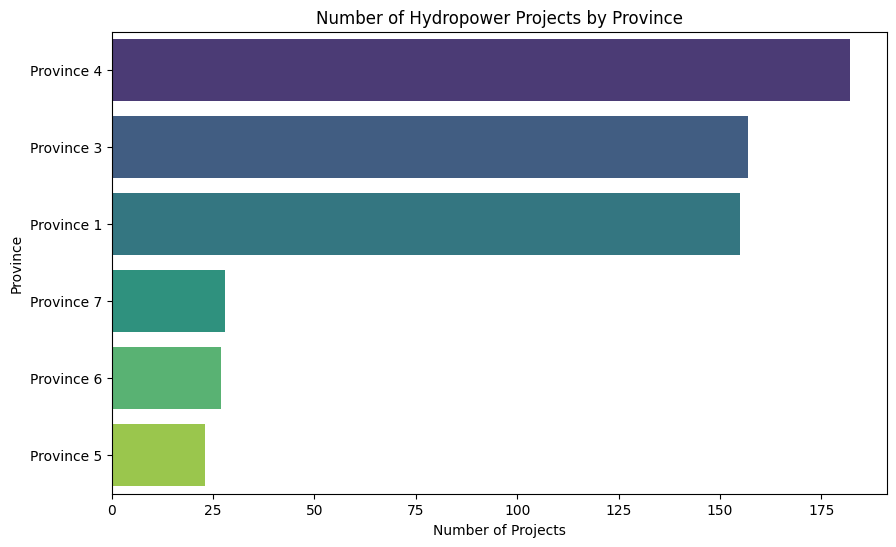

In [73]:
plot_projects_by_province()

In [10]:
# 6. Most common license types
def license_type_distribution():
    return df['License Type'].value_counts()

In [11]:
# 7. Trend of license issuance per year
def plot_license_issuance_trend():
    df['Year'] = df['Isuue Date'].dt.year
    yearly_counts = df.groupby('Year').size()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
    plt.title('Trend of License Issuance Over Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Licenses Issued')
    plt.grid()
    plt.show()

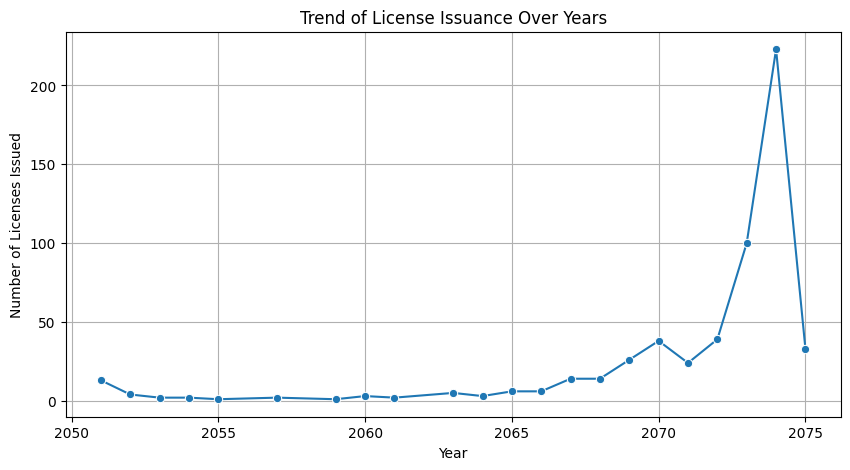

In [85]:
plot_license_issuance_trend()

In [12]:
# 8. Top rivers with the most hydropower projects
def top_rivers_with_projects(n=10):
    return df['River'].value_counts().head(n)


In [83]:
top_rivers_with_projects()

River
Seti Khola      11
Mai Khola       11
Tamor            9
Trishuli         7
Hewa Khola       7
Modi Khola       7
Kali Gandaki     7
Kabeli Khola     7
Balephi          7
Solu Khola       7
Name: count, dtype: int64

In [13]:
# 9. Mapping hydropower projects (Requires folium)
def plot_hydropower_map():
    import folium
    from folium.plugins import MarkerCluster
    
    map_hydro = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=7)
    marker_cluster = MarkerCluster().add_to(map_hydro)
    
    for _, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Project']} ({row['Capacity (MW)']} MW)",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)
    
    return map_hydro

In [75]:
plot_hydropower_map()

In [14]:

# 10. Top promoters by number of projects
def top_promoters(n=10):
    return df['Promoter'].value_counts().head(n)


In [81]:
top_promoters(10)

Promoter
Nepal Electricity Authority                             28
Chilime Hydropower Company Limited                       4
Vidhyut Utpadan Company Limited                          3
Universal Power Company P. Ltd                           3
Dordi Khola Jalvidyut Company Limited                    3
Butwal Power Company                                     3
Gezhouba Group Power Investment Nepal Pvt. Ltd.          3
Kabeli Hydropower Company Pvt. Ltd                       2
Ram Janaki Hydropower Pvt. Ltd                           2
Arun Valley Hydropower Development Company Pvt. Ltd.     2
Name: count, dtype: int64